# Intensity distribution

In this notebook we conduct measurements with the photodiode and different constellations of the acousto-optic deflectors.

Thorlabs photodiode is set to 50dB.

In [1]:
import os
import numpy as np
import pandas as pd

datadir = '../../dataset/intensity'
figuredir = '../../figure/intensity/distribution'

from matplotlib import pyplot as plt

T = 26e-3
f0 = 80e6
f1 = 120e6

os.makedirs(figuredir, exist_ok=True)

In [2]:
def to_intensity_matrix(df):
    df = df[(df.time > 0) & (df.time < T)]
    df['frequency'] = f0 + (f1 - f0) * df.time / (df.time.max() - df.time.min())

    U = [float(c.split('@')[-1]) for c in df.columns if c.startswith('voltage')]
    M = df[[c for c in df.columns if c.startswith('voltage')]].values
    
    return df.frequency.values, np.array(U), M

def to_intensity_matrix2(df):
    df = df[(df.time > 0) & (df.time < 260e-3)]
    df['frequency'] = f0 + (f1 - f0) * df.time / (df.time.max() - df.time.min())

    U = [float(c.split('@')[-1].split('%')[0]) for c in df.columns if c.startswith('voltage')]
    M = df[[c for c in df.columns if c.startswith('voltage')]].values
    
    return df.frequency.values, np.array(U), M

def to_intensity_matrix3(df):
    df = df[(df.time > 0) & (df.time < 260e-3)]
    df['frequency'] = f0 + (f1 - f0) * df.time / (df.time.max() - df.time.min())

    U = [float(c.split('@')[-1].split('MHz')[0])*1e6 for c in df.columns if c.startswith('voltage')]
    M = df[[c for c in df.columns if c.startswith('voltage')]].values
    
    return df.frequency.values, np.array(U), M

In [7]:
hh = pd.read_hdf(os.path.join(datadir, 'unpaired-amplitude.h5'), 'horizontal_element_horizontal_socket')
hv = pd.read_hdf(os.path.join(datadir, 'unpaired-amplitude.h5'), 'horizontal_element_vertical_socket')
vh = pd.read_hdf(os.path.join(datadir, 'unpaired-amplitude.h5'), 'vertical_element_horizontal_socket')
vv = pd.read_hdf(os.path.join(datadir, 'unpaired-amplitude.h5'), 'vertical_element_vertical_socket')

hh_f, hh_U, hh_I = to_intensity_matrix(hh)
hv_f, hv_U, hv_I = to_intensity_matrix(hv)
vv_f, vv_U, vv_I = to_intensity_matrix(vv)
vh_f, vh_U, vh_I = to_intensity_matrix(vh)

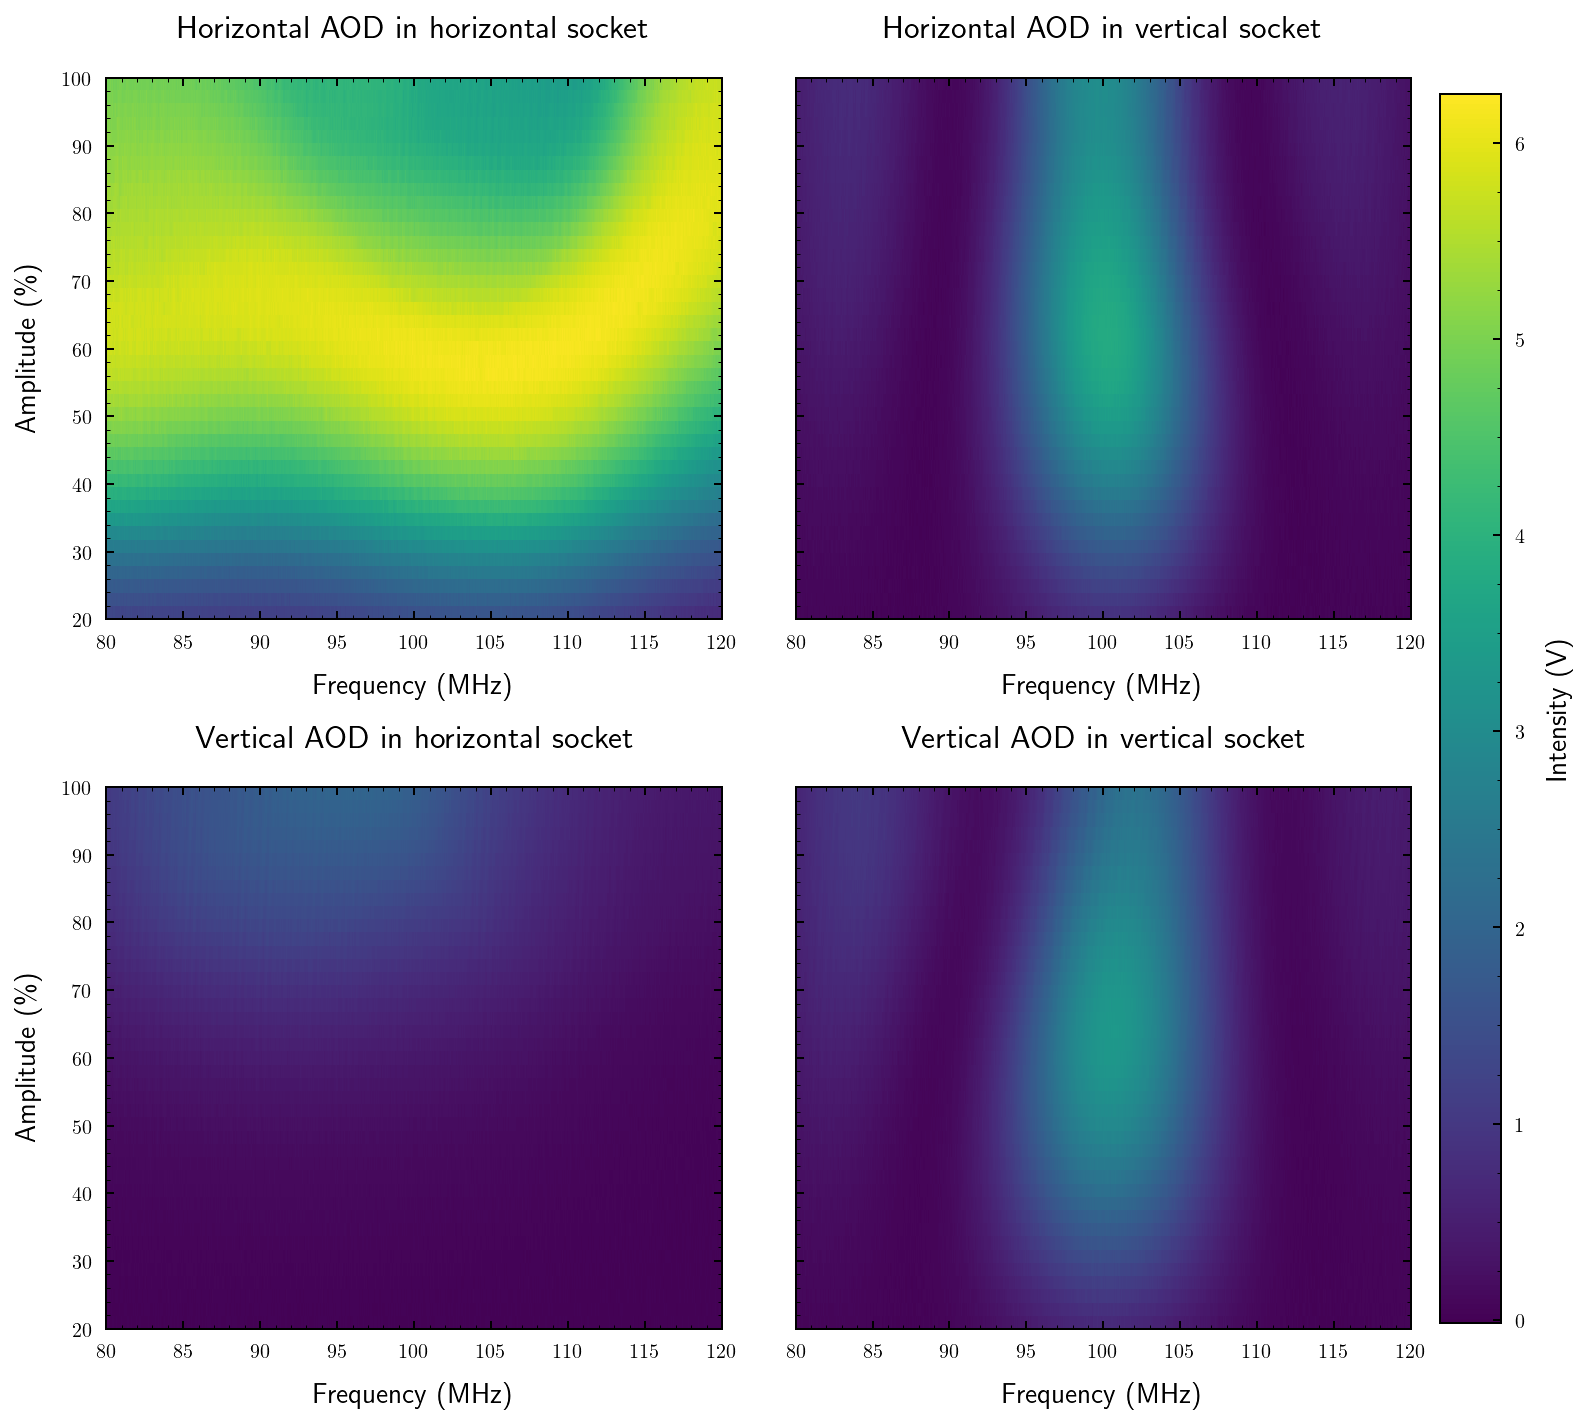

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharey=True)

vmin = np.min([hh_I.min(), hv_I.min(), vh_I.min(), vv_I.min()])
vmax = np.max([hh_I.max(), hv_I.max(), vh_I.max(), vv_I.max()])

axes = axes.flatten()

axes[0].set_title('Horizontal AOD in horizontal socket')
axes[0].set_xlabel('Frequency (MHz)')
axes[0].set_ylabel('Amplitude (\%)')
axes[0].imshow(np.rot90(hh_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[hh_f.min() / 1e6, hh_f.max() / 1e6, hh_U.min() * 1e2, hh_U.max() * 1e2])

axes[1].set_title('Horizontal AOD in vertical socket')
axes[1].set_xlabel('Frequency (MHz)')
axes[1].imshow(np.rot90(hv_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[hv_f.min() / 1e6, hv_f.max() / 1e6, hv_U.min() * 1e2, hv_U.max()  * 1e2])

axes[2].set_title('Vertical AOD in horizontal socket')
axes[2].set_xlabel('Frequency (MHz)')
axes[2].set_ylabel('Amplitude (\%)')
axes[2].imshow(np.rot90(vh_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[vh_f.min() / 1e6, vh_f.max() / 1e6, vh_U.min() * 1e2, vh_U.max() * 1e2])

axes[3].set_title('Vertical AOD in vertical socket')
axes[3].set_xlabel('Frequency (MHz)')
im = axes[3].imshow(np.rot90(vv_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[vv_f.min() / 1e6, vv_f.max() / 1e6, vv_U.min() * 1e2, vv_U.max() * 1e2])

fig.subplots_adjust(right=1.16)
fig.colorbar(im, ax=list(axes), label='Intensity (V)', shrink=1.13)
fig.tight_layout()
#fig.savefig(os.path.join(figuredir, 'unpaired-amplitude.pdf'))

plt.show()

In [9]:
a_hsweep = pd.read_hdf(os.path.join(datadir, 'anticipated-amplitude.h5'), 'hsweep')
a_vsweep = pd.read_hdf(os.path.join(datadir, 'anticipated-amplitude.h5'), 'vsweep')

a_hsweep_ex = pd.read_hdf(os.path.join(datadir, 'exchanged-amplitude.h5'), 'hsweep')
a_vsweep_ex = pd.read_hdf(os.path.join(datadir, 'exchanged-amplitude.h5'), 'vsweep')

ah_f, ah_U, ah_I = to_intensity_matrix2(a_hsweep)
av_f, av_U, av_I = to_intensity_matrix2(a_vsweep)
aeh_f, aeh_U, aeh_I = to_intensity_matrix2(a_hsweep_ex)
aev_f, aev_U, aev_I = to_intensity_matrix2(a_vsweep_ex)

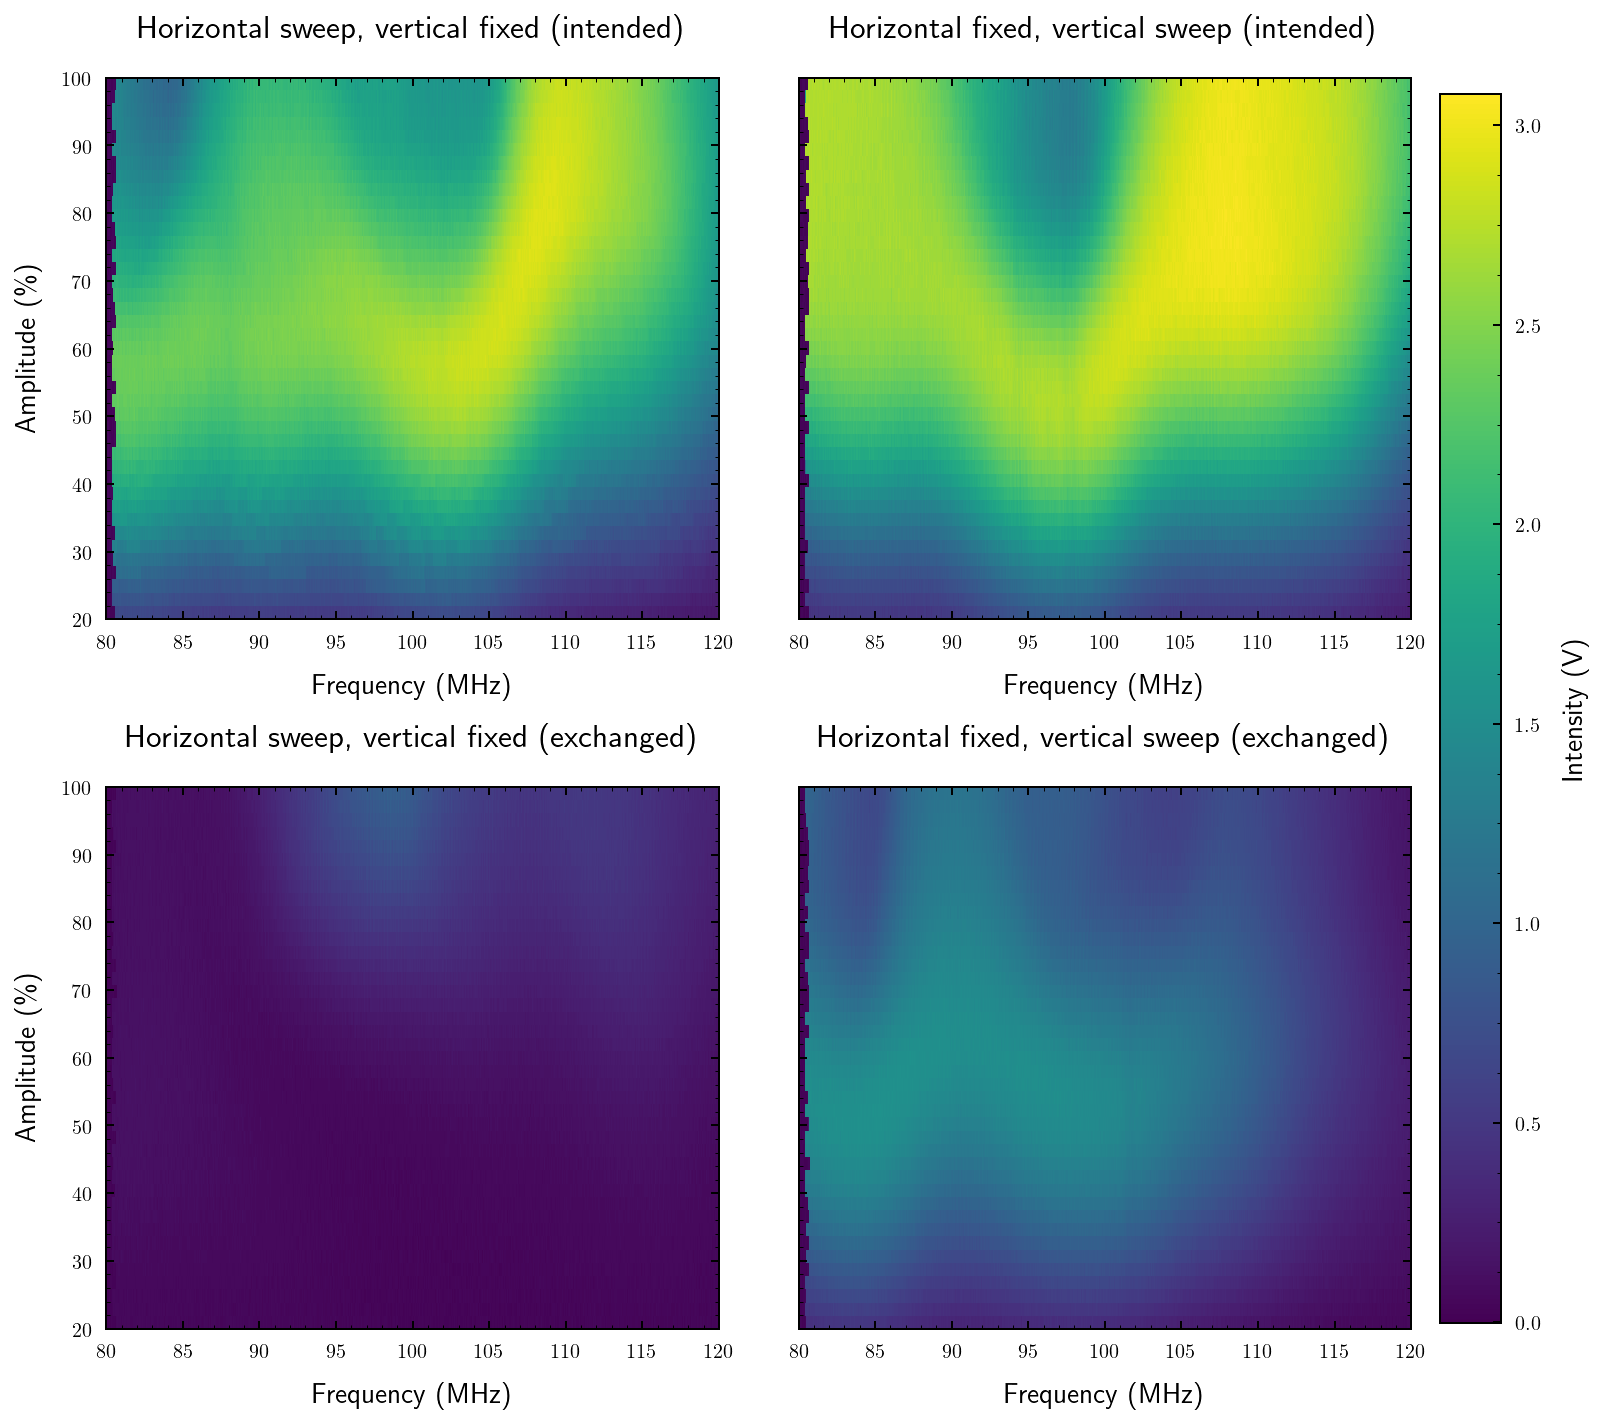

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharey=True)

vmin = np.min([ah_I.min(), av_I.min(), aeh_I.min(), aev_I.min()])
vmax = np.max([ah_I.max(), av_I.max(), aeh_I.max(), aev_I.max()])

axes = axes.flatten()

axes[0].set_title('Horizontal sweep, vertical fixed (intended)')
axes[0].set_xlabel('Frequency (MHz)')
axes[0].set_ylabel('Amplitude (\%)')
axes[0].imshow(np.rot90(ah_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[ah_f.min() / 1e6, ah_f.max() / 1e6, ah_U.min() * 1e2, ah_U.max() * 1e2])

axes[1].set_title('Horizontal fixed, vertical sweep (intended)')
axes[1].set_xlabel('Frequency (MHz)')
axes[1].imshow(np.rot90(av_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[av_f.min() / 1e6, av_f.max() / 1e6, av_U.min() * 1e2, av_U.max() * 1e2])

axes[2].set_title('Horizontal sweep, vertical fixed (exchanged)')
axes[2].set_xlabel('Frequency (MHz)')
axes[2].set_ylabel('Amplitude (\%)')
axes[2].imshow(np.rot90(aeh_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[aeh_f.min() / 1e6, aeh_f.max() / 1e6, aeh_U.min() * 1e2, aeh_U.max() * 1e2])

axes[3].set_title('Horizontal fixed, vertical sweep (exchanged)')
axes[3].set_xlabel('Frequency (MHz)')
im = axes[3].imshow(np.rot90(aev_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[aev_f.min() / 1e6, aev_f.max() / 1e6, aev_U.min() * 1e2, aev_U.max() * 1e2])

fig.subplots_adjust(right=1.16)
fig.colorbar(im, ax=list(axes), label='Intensity (V)', shrink=1.13)
fig.tight_layout()
#fig.savefig(os.path.join(figuredir, 'paired-amplitude.pdf'))

plt.show()

In [8]:
ra = pd.read_csv('../../dataset/intensity/sample-frequency.csv')

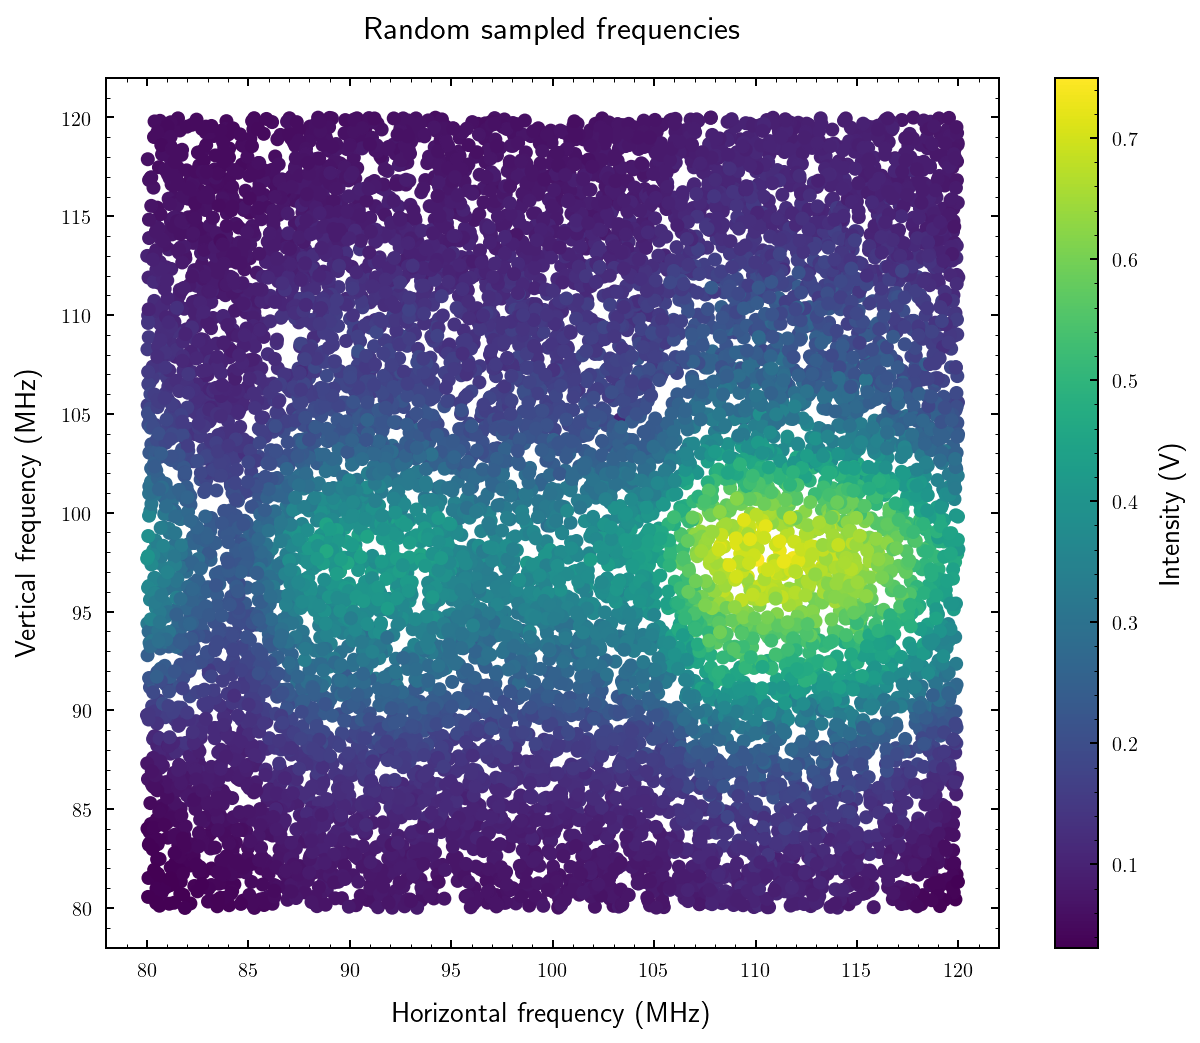

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(ra.hfrequency / 1e6, ra.vfrequency / 1e6, c=ra.voltage)
plt.title('Random sampled frequencies')
plt.xlabel('Horizontal frequency (MHz)')
plt.ylabel('Vertical frequency (MHz)')
plt.colorbar(label='Intensity (V)')
plt.savefig(os.path.join(figuredir, 'sample-frequency.pdf'))
plt.show()

In [11]:
f_hsweep = pd.read_hdf(os.path.join(datadir, 'anticipated-frequency.h5'), 'hsweep')
f_vsweep = pd.read_hdf(os.path.join(datadir, 'anticipated-frequency.h5'), 'vsweep')

fh_f, fh_U, fh_I = to_intensity_matrix3(f_hsweep)
fv_f, fv_U, fv_I = to_intensity_matrix3(f_vsweep)

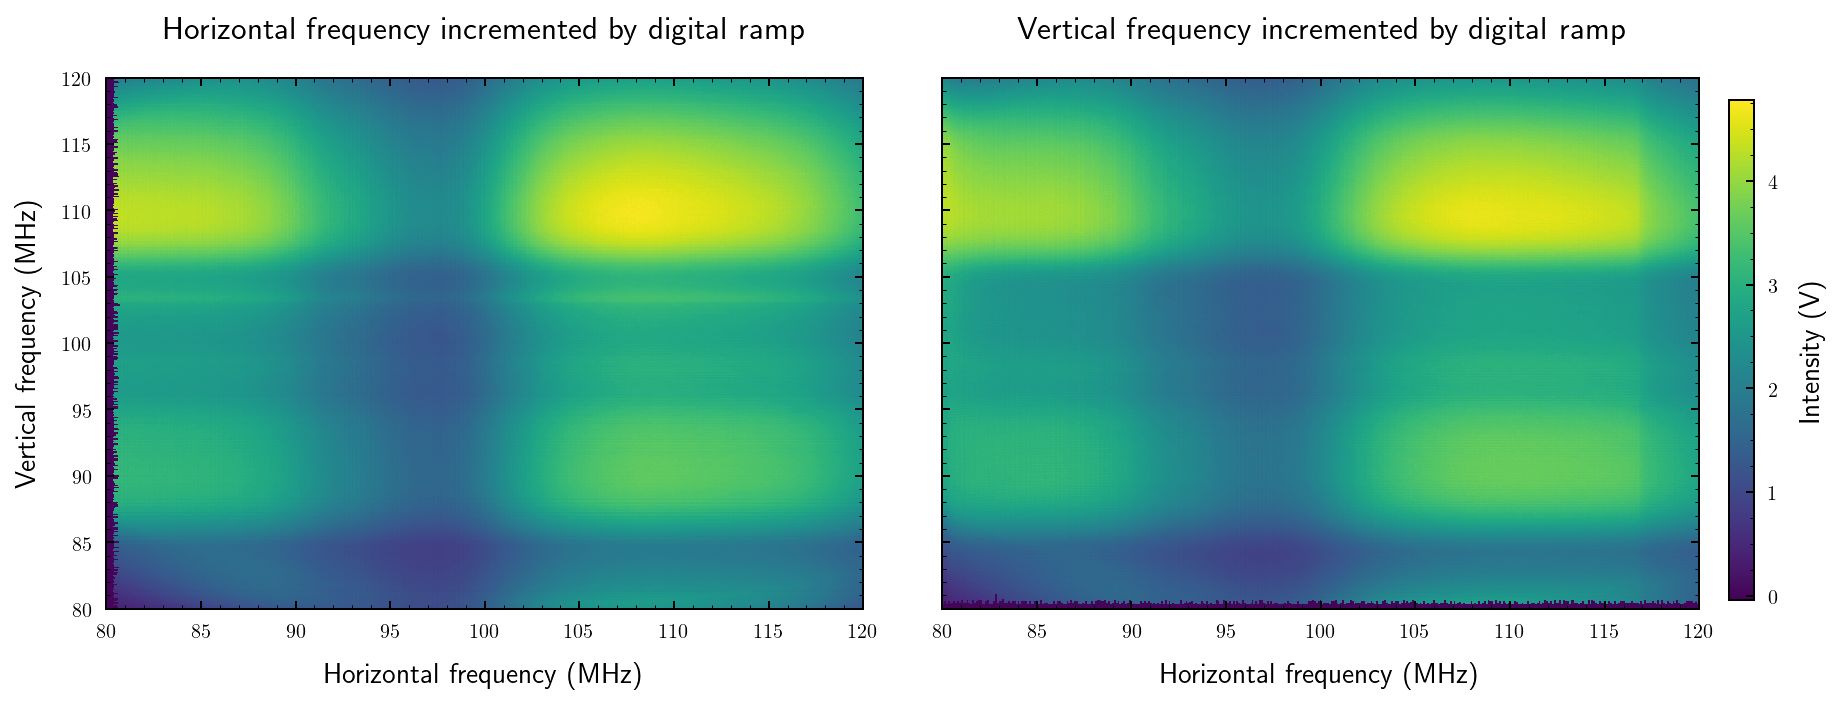

In [17]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)

vmin = np.min([fh_I.min(), fv_I.min()])
vmax = np.max([fh_I.max(), fv_I.max()])

axes[0].set_title('Horizontal frequency incremented by digital ramp')
axes[0].set_xlabel('Horizontal frequency (MHz)')
axes[0].set_ylabel('Vertical frequency (MHz)')
axes[0].imshow(np.rot90(fh_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[fh_f.min() / 1e6, fh_f.max() / 1e6, fh_U.min() / 1e6, fh_U.max() / 1e6])

axes[1].set_title('Vertical frequency incremented by digital ramp')
axes[1].set_xlabel('Horizontal frequency (MHz)')
im = axes[1].imshow(np.flipud(fv_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[fv_f.min() / 1e6, fv_f.max() / 1e6, fv_U.min() / 1e6, fv_U.max() / 1e6])

fig.subplots_adjust(right=1.16)
fig.colorbar(im, ax=list(axes), label='Intensity (V)', shrink=.92)
fig.tight_layout()
#fig.savefig(os.path.join(figuredir, 'paired-frequency.pdf'))

plt.show()

In [19]:
from scipy import misc

X = misc.imresize(np.rot90(fh_I), (401, 401))
Y = misc.imresize(np.flipud(fv_I), (401, 401))

Z = np.abs(X-Y)

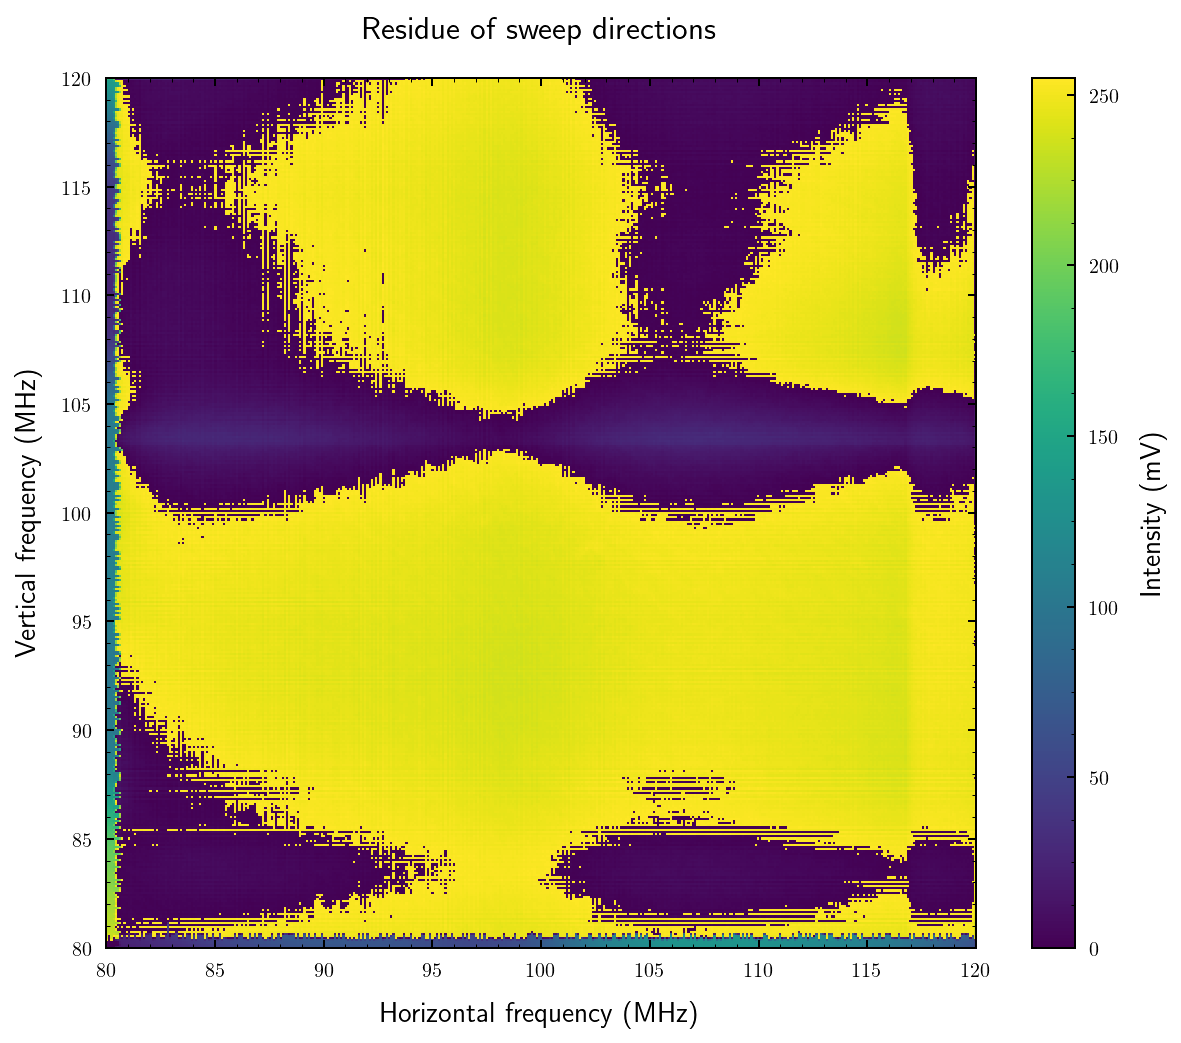

In [20]:
plt.figure(figsize=(10, 8))
plt.imshow(Z, extent=[80, 120, 80, 120])
plt.title('Residue of sweep directions')
plt.xlabel('Horizontal frequency (MHz)')
plt.ylabel('Vertical frequency (MHz)')
plt.colorbar(label='Intensity (mV)')
plt.savefig(os.path.join(figuredir, 'paired-frequency-residue.pdf'))
plt.show()

In [14]:
dds = pd.read_hdf(os.path.join(datadir, 'signal-generator-dds.h5'), 'DDS')
gen = pd.read_hdf(os.path.join(datadir, 'signal-generator-gen.h5'), 'RS-SML02')

In [15]:
def preprocess(df):
    df = df[(df.time > 0) & (df.time < .8)]
    df['frequency'] = 80e6 + 40e6 * df.time / .8
    
    return df

In [16]:
dds_ = preprocess(dds)
gen_ = preprocess(gen)

gen_.head(3)

,time,voltage,frequency
6492,0.000003,0.219727,8.000015e+07
6493,0.000018,0.042991,8.000091e+07
6494,0.000034,0.028263,8.000168e+07


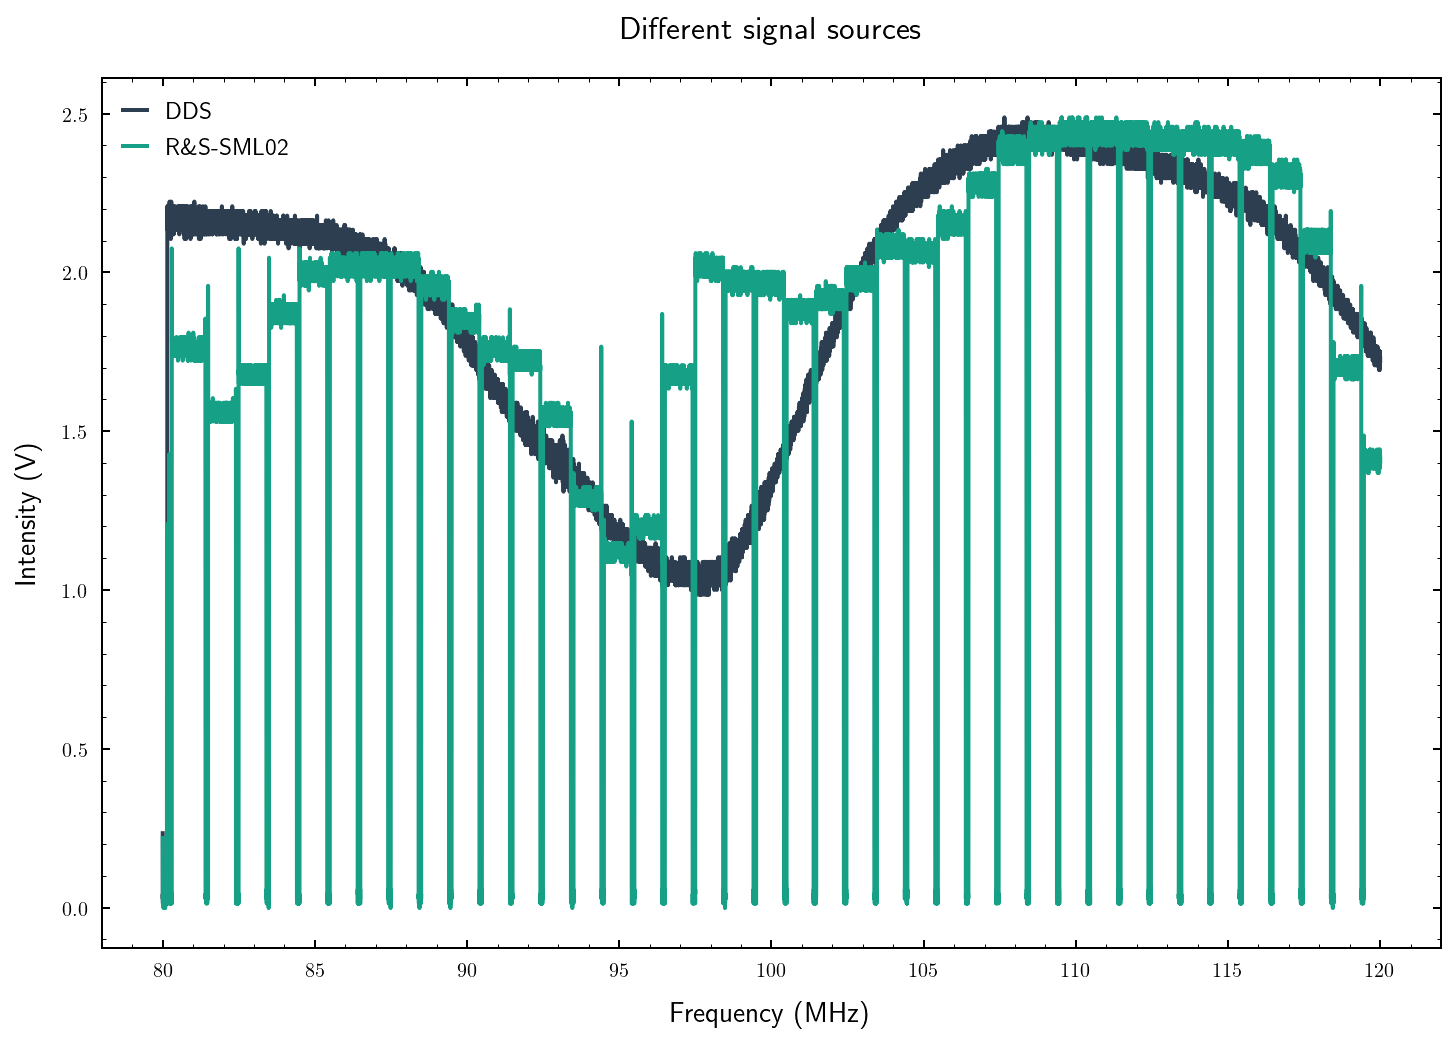

In [17]:
plt.figure(figsize=(12, 8))
plt.plot(dds_.frequency / 1e6, dds_.voltage, label='DDS', color='#2c3e50')
plt.plot(gen_.frequency / 1e6, gen_.voltage, label='R\&S-SML02', color='#16a085')
plt.title('Different signal sources')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Intensity (V)')
plt.legend()
plt.savefig(os.path.join(figuredir, 'signal-sources.pdf'))
plt.show()

In [16]:
hc = pd.read_hdf(os.path.join(datadir, 'unpaired-angle.h5'), 'perp')
hl = pd.read_hdf(os.path.join(datadir, 'unpaired-angle.h5'), 'left')
hr = pd.read_hdf(os.path.join(datadir, 'unpaired-angle.h5'), 'right')

hc_f, hc_A, hc_I = to_intensity_matrix2(hc)
hl_f, hl_A, hl_I = to_intensity_matrix2(hl)
hr_f, hr_A, hr_I = to_intensity_matrix2(hr)

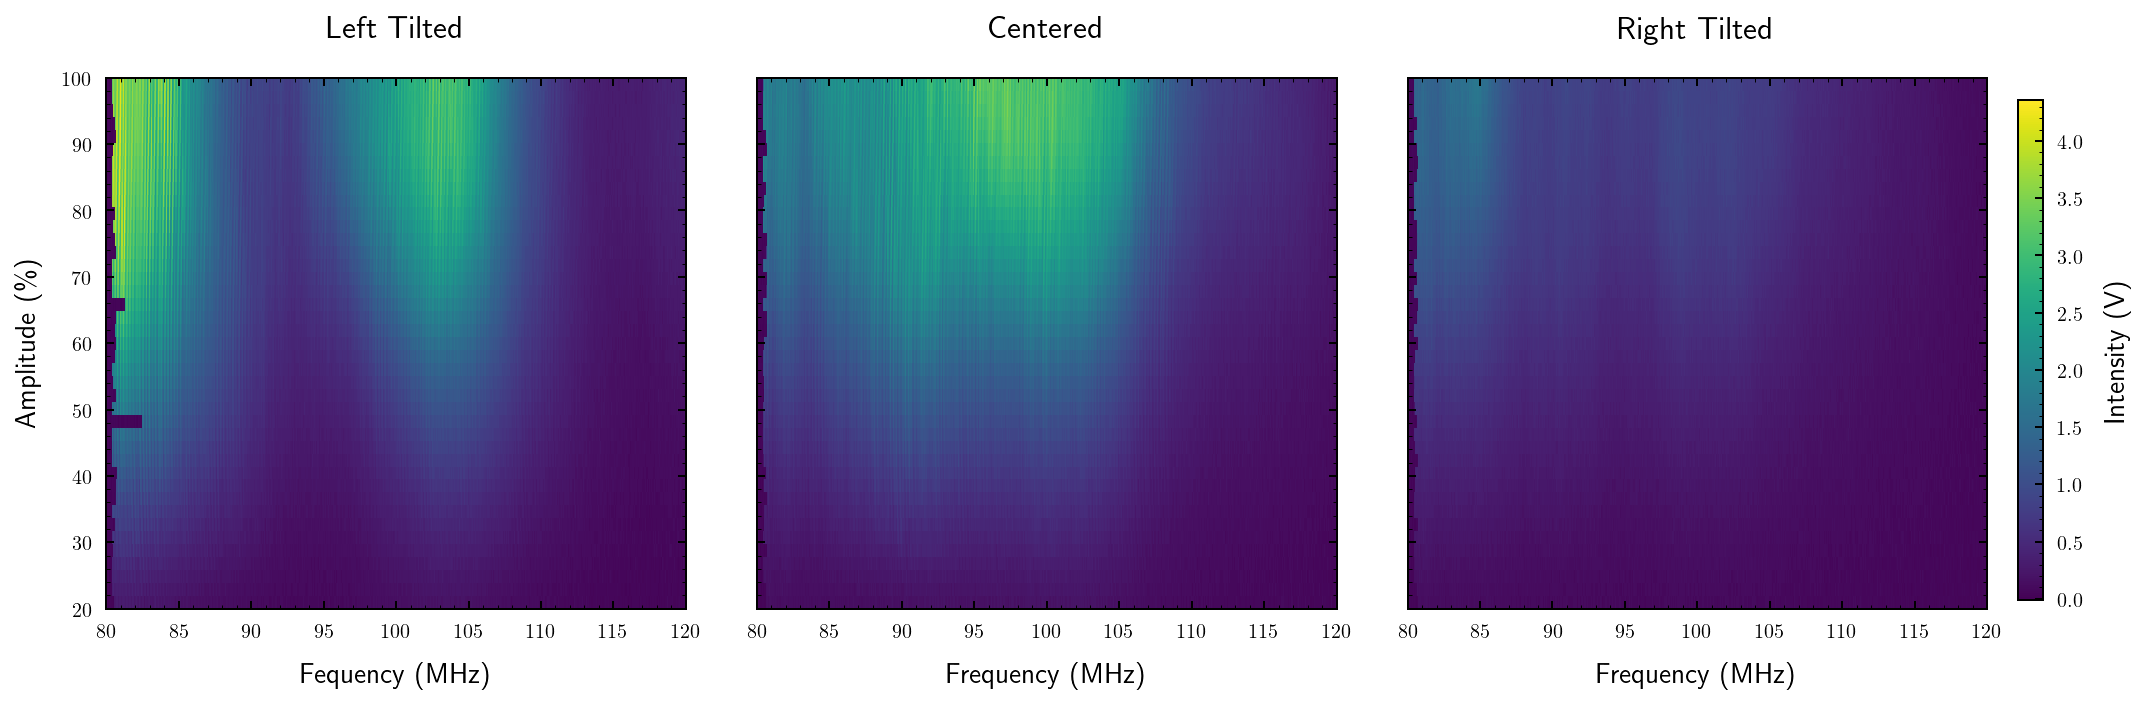

In [21]:
fig, axes = plt.subplots(ncols=3, figsize=(14, 5), sharey=True)

vmin = np.min([hc_I.min(), hl_I.min(), hr_I.min()])
vmax = np.max([hc_I.max(), hl_I.max(), hr_I.max()])                  

axes[0].set_title('Left Tilted')
axes[0].set_xlabel('Fequency (MHz)')
axes[0].set_ylabel('Amplitude (\%)')
axes[0].imshow(np.rot90(hl_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[hl_f.min() / 1e6, hl_f.max() / 1e6, hl_A.min() * 1e2, hl_A.max() * 1e2])

axes[1].set_title('Centered')
axes[1].set_xlabel('Frequency (MHz)')
axes[1].imshow(np.rot90(hc_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[hc_f.min() / 1e6, hc_f.max() / 1e6, hc_A.min() * 1e2, hc_A.max() * 1e2])

axes[2].set_title('Right Tilted')
axes[2].set_xlabel('Frequency (MHz)')
im = axes[2].imshow(np.rot90(hr_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[hr_f.min() / 1e6, hr_f.max() / 1e6, hr_A.min() * 1e2, hr_A.max() * 1e2])

fig.subplots_adjust(right=1.16)
fig.colorbar(im, ax=list(axes), label='Intensity (V)', shrink=.92)
fig.tight_layout()
#fig.savefig(os.path.join(figuredir, 'unpaired-tilted.pdf'))

plt.show()

In [22]:
p100 = pd.read_hdf(os.path.join(datadir, 'unpaired-polarisation.h5'), '100')
p110 = pd.read_hdf(os.path.join(datadir, 'unpaired-polarisation.h5'), '110')
p120 = pd.read_hdf(os.path.join(datadir, 'unpaired-polarisation.h5'), '120')
p126 = pd.read_hdf(os.path.join(datadir, 'unpaired-polarisation.h5'), '128')
p128 = pd.read_hdf(os.path.join(datadir, 'unpaired-polarisation.h5'), '129')
p130 = pd.read_hdf(os.path.join(datadir, 'unpaired-polarisation.h5'), '130')
p132 = pd.read_hdf(os.path.join(datadir, 'unpaired-polarisation.h5'), '131')
p134 = pd.read_hdf(os.path.join(datadir, 'unpaired-polarisation.h5'), '132')
p140 = pd.read_hdf(os.path.join(datadir, 'unpaired-polarisation.h5'), '140')
p150 = pd.read_hdf(os.path.join(datadir, 'unpaired-polarisation.h5'), '150')

p100_f, p100_A, p100_I = to_intensity_matrix2(p100)
p110_f, p110_A, p110_I = to_intensity_matrix2(p110)
p120_f, p120_A, p120_I = to_intensity_matrix2(p120)
p126_f, p126_A, p126_I = to_intensity_matrix2(p126)
p128_f, p128_A, p128_I = to_intensity_matrix2(p128)
p130_f, p130_A, p130_I = to_intensity_matrix2(p130)
p132_f, p132_A, p132_I = to_intensity_matrix2(p132)
p134_f, p134_A, p134_I = to_intensity_matrix2(p134)
p140_f, p140_A, p140_I = to_intensity_matrix2(p140)
p150_f, p150_A, p150_I = to_intensity_matrix2(p150)

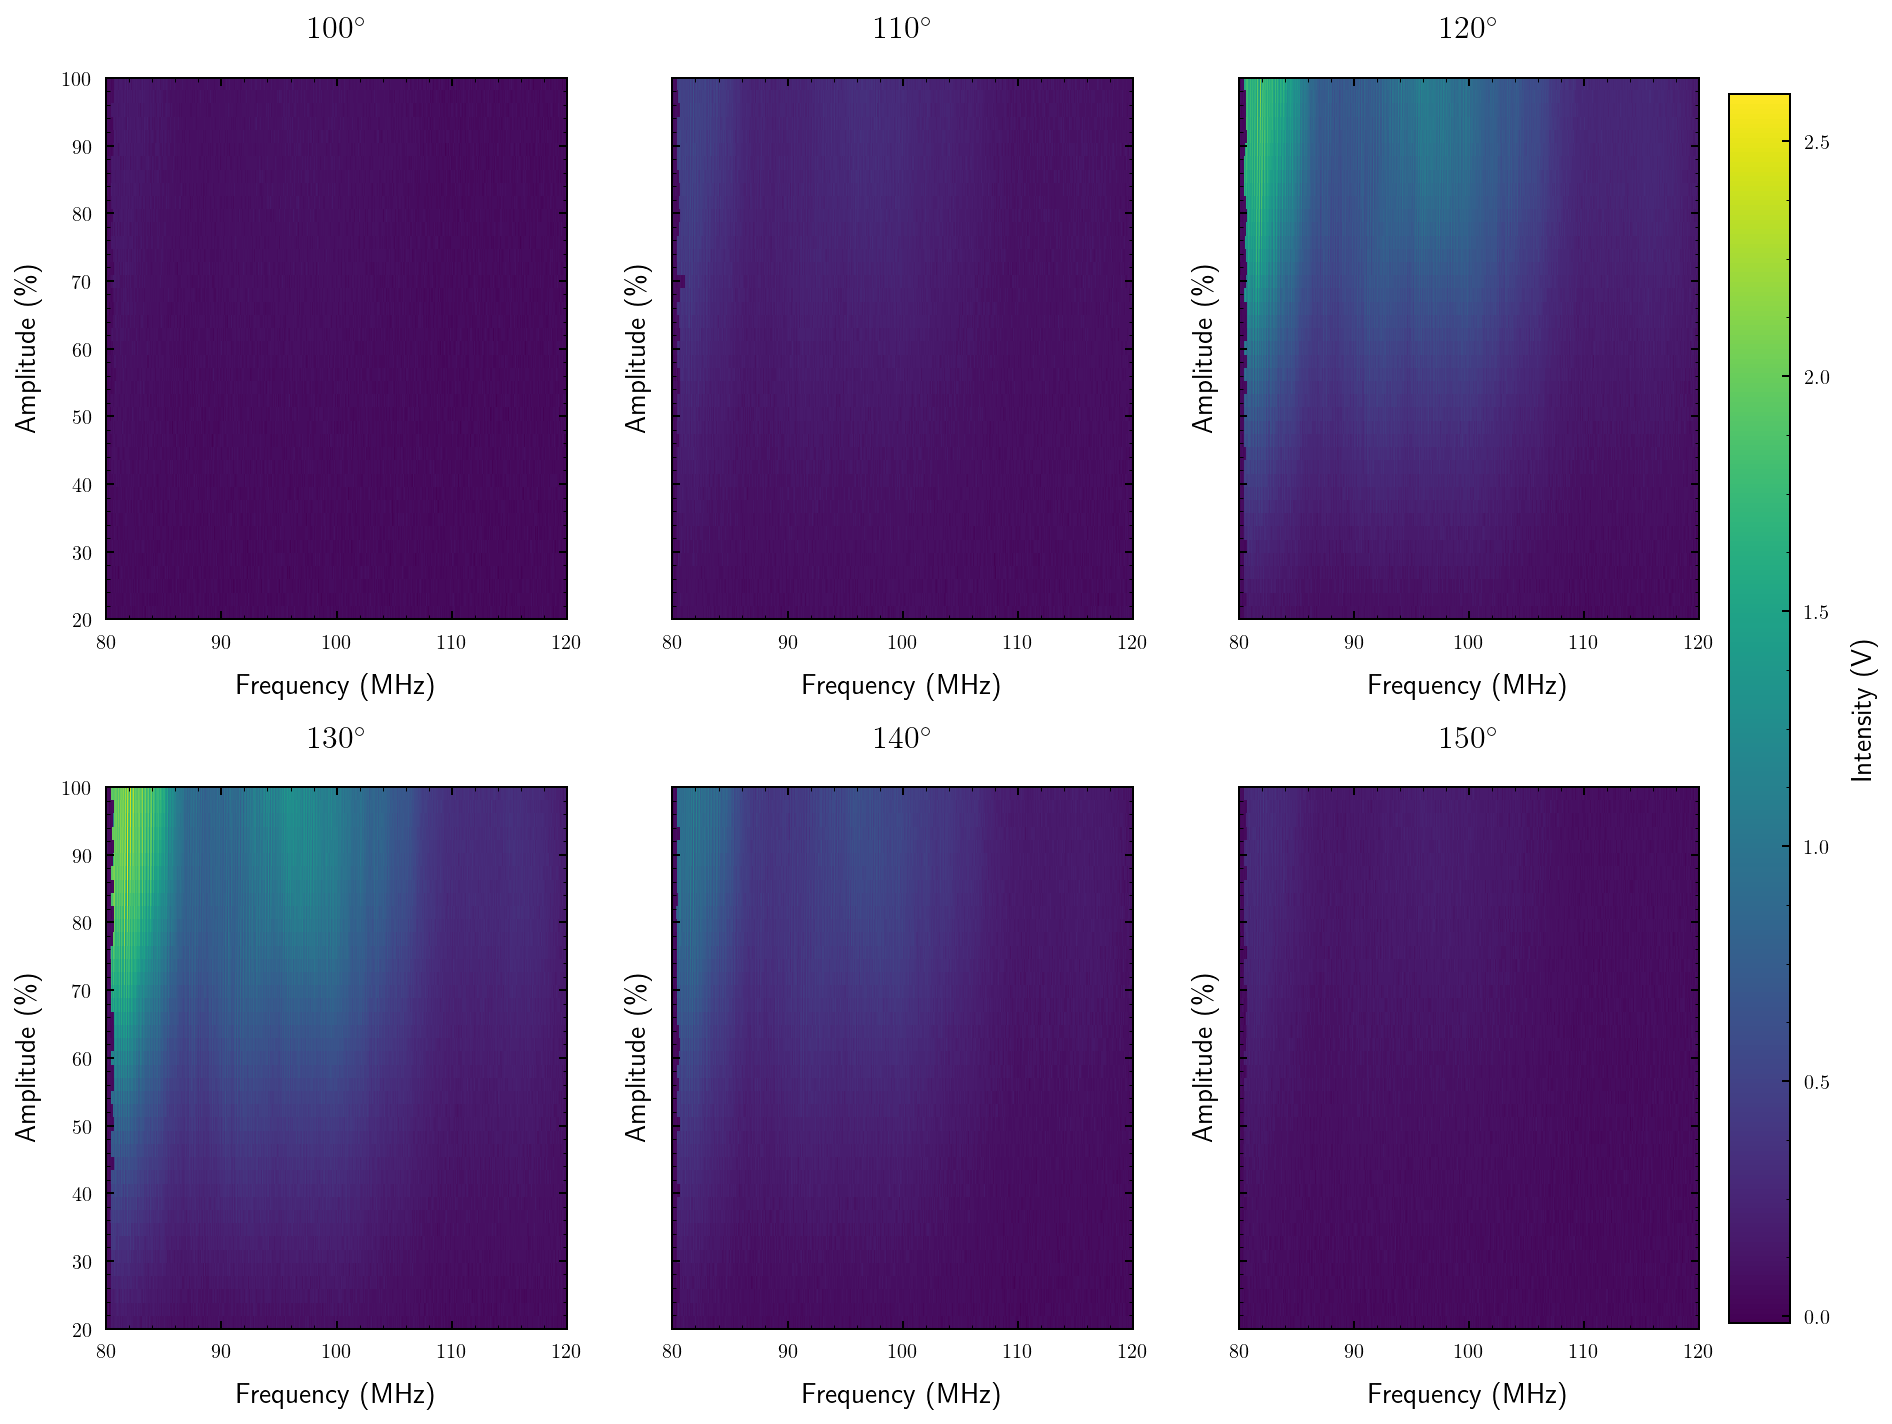

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10), sharey=True)

vmin = np.min([p100_I.min(), p110_I.min(), p120_I.min(), p130_I.min(), p140_I.min(), p150_I.min()])
vmax = np.max([p100_I.max(), p110_I.max(), p120_I.max(), p130_I.max(), p140_I.max(), p150_I.max()])

axes = axes.flatten()

axes[0].set_title('$100^\circ$')
axes[0].set_xlabel('Frequency (MHz)')
axes[0].set_ylabel('Amplitude (\%)')
axes[0].imshow(np.rot90(p100_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[p100_f.min() / 1e6, p100_f.max() / 1e6, p100_A.min() * 1e2, p100_A.max() * 1e2])

axes[1].set_title('$110^\circ$')
axes[1].set_xlabel('Frequency (MHz)')
axes[1].set_ylabel('Amplitude (\%)')
axes[1].imshow(np.rot90(p110_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[p110_f.min() / 1e6, p110_f.max() / 1e6, p110_A.min() * 1e2, p110_A.max() * 1e2])

axes[2].set_title('$120^\circ$')
axes[2].set_xlabel('Frequency (MHz)')
axes[2].set_ylabel('Amplitude (\%)')
axes[2].imshow(np.rot90(p120_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[p120_f.min() / 1e6, p120_f.max() / 1e6, p120_A.min() * 1e2, p120_A.max() * 1e2])

axes[3].set_title('$130^\circ$')
axes[3].set_xlabel('Frequency (MHz)')
axes[3].set_ylabel('Amplitude (\%)')
axes[3].imshow(np.rot90(p130_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[p130_f.min() / 1e6, p130_f.max() / 1e6, p130_A.min() * 1e2, p130_A.max() * 1e2])

axes[4].set_title('$140^\circ$')
axes[4].set_xlabel('Frequency (MHz)')
axes[4].set_ylabel('Amplitude (\%)')
axes[4].imshow(np.rot90(p140_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[p140_f.min() / 1e6, p140_f.max() / 1e6, p140_A.min() * 1e2, p140_A.max() * 1e2])

axes[5].set_title('$150^\circ$')
axes[5].set_xlabel('Frequency (MHz)')
axes[5].set_ylabel('Amplitude (\%)')
im = axes[5].imshow(np.rot90(p150_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[p150_f.min() / 1e6, p150_f.max() / 1e6, p150_A.min() * 1e2, p150_A.max() * 1e2])

fig.subplots_adjust(right=1.16)
fig.colorbar(im, ax=list(axes), label='Intensity (V)', shrink=1.13)
fig.tight_layout()
#fig.savefig(os.path.join(figuredir, 'paired-amplitude.pdf'))

plt.show()

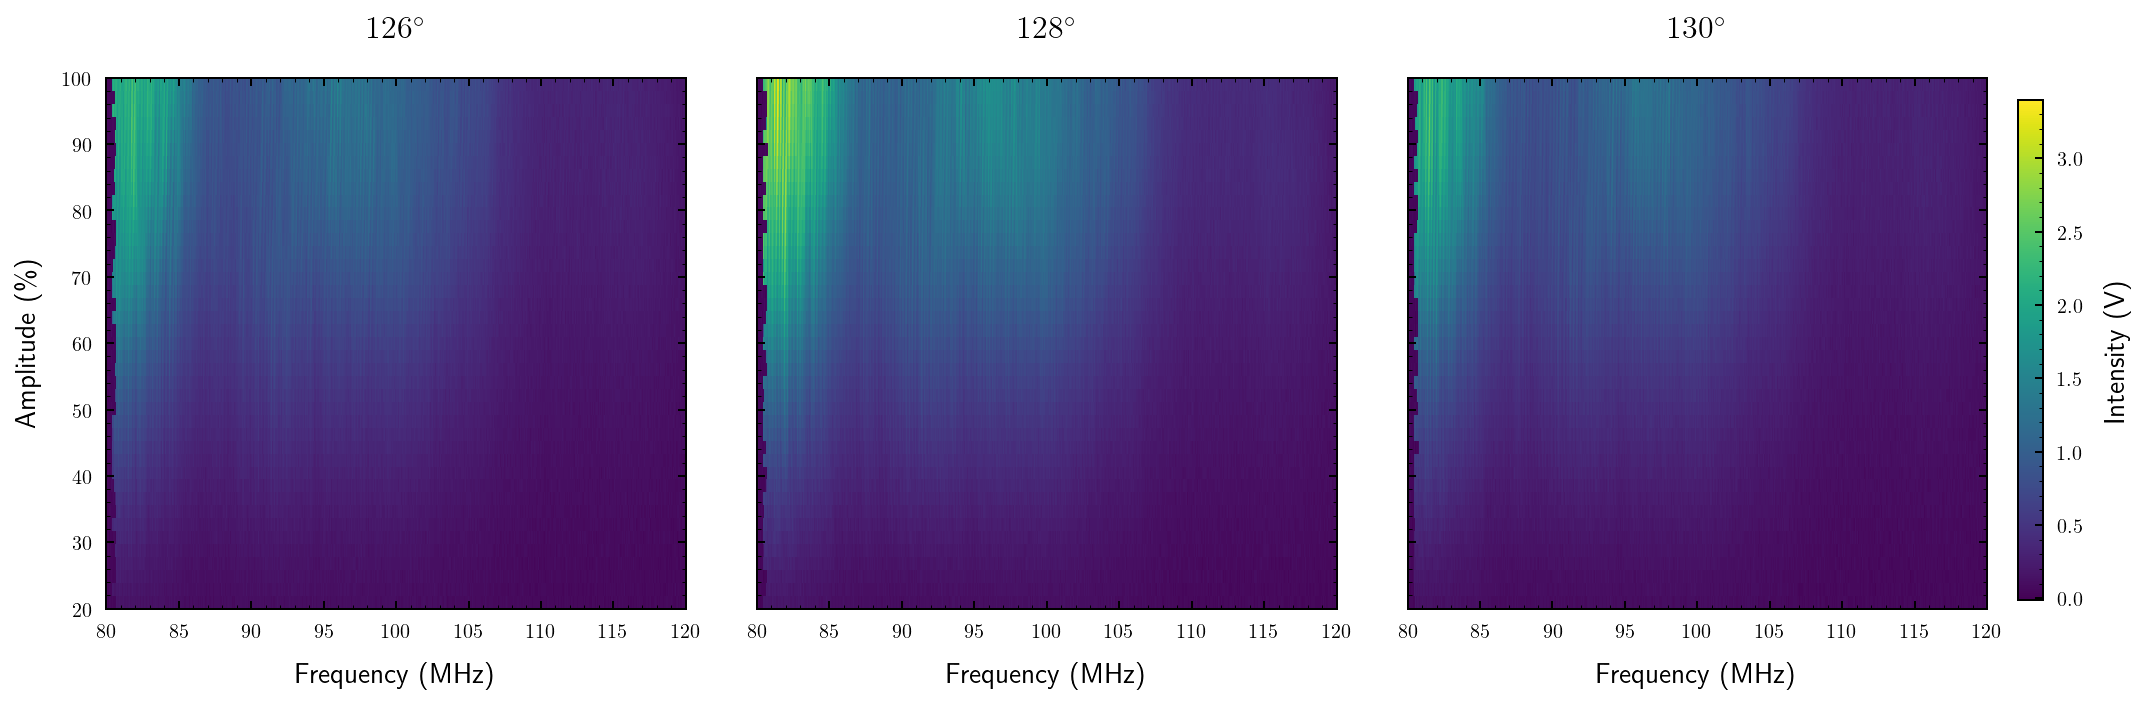

In [29]:
fig, axes = plt.subplots(ncols=3, figsize=(14, 5), sharey=True)

vmin = np.min([p128_I.min(), p130_I.min(), p132_I.min()])
vmax = np.max([p128_I.max(), p130_I.max(), p132_I.max()])

axes[0].set_title('$126^\circ$')
axes[0].set_xlabel('Frequency (MHz)')
axes[0].set_ylabel('Amplitude (\%)')
axes[0].imshow(np.rot90(p126_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[p126_f.min() / 1e6, p126_f.max() / 1e6, p126_A.min() * 1e2, p126_A.max() * 1e2])

axes[1].set_title('$128^\circ$')
axes[1].set_xlabel('Frequency (MHz)')
axes[1].imshow(np.rot90(p128_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[p128_f.min() / 1e6, p128_f.max() / 1e6, p128_A.min() * 1e2, p128_A.max() * 1e2])

axes[2].set_title('$130^\circ$')
axes[2].set_xlabel('Frequency (MHz)')
im = axes[2].imshow(np.rot90(p130_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[p130_f.min() / 1e6, p130_f.max() / 1e6, p130_A.min() * 1e2, p130_A.max() * 1e2])

fig.subplots_adjust(right=1.16)
fig.colorbar(im, ax=list(axes), label='Intensity (V)', shrink=.92)
fig.tight_layout()
#fig.savefig(os.path.join(figuredir, 'unpaired-tilted.pdf'))

plt.show()